In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('pd2')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "pd2"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : time integration towards stationary state"%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)
ac.save(r1,'1')

print("\n%s : second run : continuation of stationary state"%pgm)
r2 = ac.run(r1,IPS=17,ICP=[1],ISP=2,NMX=15,NPR=50,DS=-0.1,DSMAX=1.0,UZSTOP={1:0.0},runner=runner)
ac.save(r2,'2')

Copying demo pd2 ... done

Demo pd2 is started

pd2 : first run : time integration towards stationary state
gfortran -fopenmp -O -c pd2.f90 -o pd2.o
gfortran -fopenmp -O pd2.o -o pd2.exe /auto/lib/*.o
Starting pd2 ...

  BR    PT  TY  LAB      TIME      INTEGRAL U(1)   MAX U(1)      MAX U(2)   
   1     1  EP    1   0.00000E+00   6.36620E-01   1.00000E+00   1.00000E+00
   1    10        2   3.30173E-01   2.08360E-01   3.23508E-01   1.00000E+00
   1    20        3   1.39181E+00   9.58280E-02   1.49742E-01   1.00000E+00
   1    30        4   4.36574E+00   7.72029E-02   1.20754E-01   1.00000E+00
   1    35  EP    5   1.08431E+01   7.64484E-02   1.19515E-01   1.00000E+00

 Total Time    0.386E+00
pd2 ... done
Saving to b.1, s.1, and d.1 ... done

pd2 : second run : continuation of stationary state
Starting pd2 ...

  BR    PT  TY  LAB    PAR(1)      INTEGRAL U(1)   MAX U(1)      MAX U(2)   
   1     8  BP    6   1.07712E+01   1.08866E-05   1.70973E-05   1.00000E+00
   1    15  EP    7   7.

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


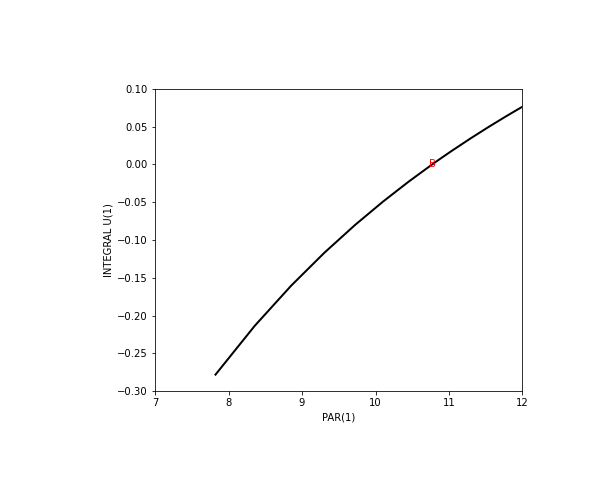

In [5]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('2')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [6]:
# clean up files

ac.delete('1')
ac.delete('2')
ac.clean()

Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting fort.* *.o *.exe *.*~ ... done
